In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
rng = np.random.default_rng()

In [6]:
save_folder = 'fig/condition_number/'
!mkdir -p $save_folder

/bin/bash: port_used: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_port_used'
/bin/bash: wait_until_port_used: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_wait_until_port_used'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_module'
/bin/bash: find_port: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_find_port'
/bin/bash: random_number: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_random_number'
/bin/bash: helmod: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_helmod'
/bin/bash: source_helpers: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_source_h

In [17]:
def condition_number(p, n, rng):
    '''p is the number of free parameters, n is the number of equations'''
    A = rng.standard_normal((p, n))
    singular_values = np.linalg.svd(A, compute_uv=False, hermitian=False)
    return singular_values[0]/singular_values[-1]

def condition_number_kernel(d, n, rng):
    '''d is the dimensionality of the space, n is the number of data points
    Resulting kernel matrix is n x n'''
    aux = rng.standard_normal((d, n))
    A = np.matmul(aux.T, aux) / d
    singular_values = np.linalg.svd(A, compute_uv=False, hermitian=False)
    return singular_values[0]/singular_values[-1]

# def condition_number_kernel_radial(d, n, rng):
#     '''d is the dimensionality of the space, n is the number of data points
#     Resulting kernel matrix is n x n'''
#     aux = rng.standard_normal((d, n))
#     print(aux.shape)
#     aux = aux[..., np.newaxis]
#     print(aux.shape)
#     print((aux.T - aux).shape)
#     A = np.exp(- 0.5 * np.matmul(aux.T - aux, aux.T - aux) / d)
#     print(A.shape)
#     print(A)
#     singular_values = np.linalg.svd(A, compute_uv=False, hermitian=False)
#     return singular_values[0]/singular_values[-1]

In [8]:
condition_number_kernel_radial(10, 50, rng)

(10, 50)
(10, 50, 1)
(10, 50, 10)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 50 is different from 10)

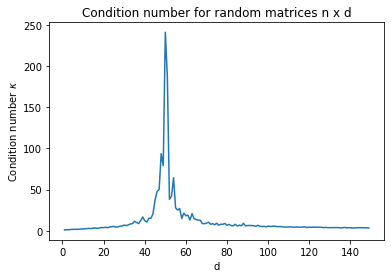

In [12]:
n = 50
span = range(1, 3*n)
c_number = []
for p in span:
    c_number.append(condition_number(p, n, rng))
    
plt.plot(span, c_number)
plt.xlabel('d')
plt.ylabel(r'Condition number $\kappa$')
plt.title('Condition number for random matrices n x d')
plt.savefig(f'{save_folder}/condition_number_vs_d.pdf', bbox_inches='tight')

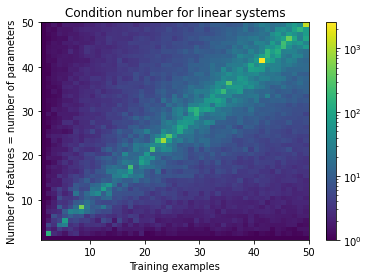

In [14]:
n_max = 50
p_max = 50

c_numbers = np.zeros(shape=(p_max-1, n_max-1))
for n in range(1, n_max):
    for p in range(1, p_max):
        c_numbers[p-1, n-1] = condition_number(p, n, rng)
        
plt.pcolor(range(1, n_max+1), range(1, p_max+1), c_numbers, norm=LogNorm())
plt.xlabel('Training examples')
plt.ylabel('Number of features = number of parameters')
plt.title('Condition number for linear systems')
plt.colorbar()
plt.savefig(f'{save_folder}/condition_number_nd.pdf', bbox_inches='tight')

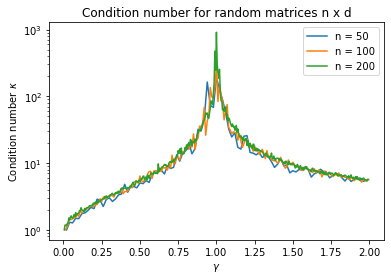

In [15]:
n_s = [50, 100, 200]

for n in n_s:
    span = np.array(range(1, 2*n))
    c_number = []
    for p in span:
        c_number.append(condition_number(p, n, rng))
    
    plt.plot(span/n, c_number, label=f'n = {n}')
plt.legend()
plt.xlabel(r'$\gamma$')
plt.yscale('log')
plt.ylabel(r'Condition number $\kappa$')
plt.title('Condition number for random matrices n x d')
plt.savefig(f'{save_folder}/condition_number_vs_gamma.pdf', bbox_inches='tight')

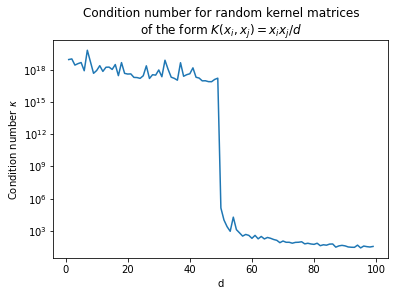

In [22]:
n = 50
span = range(1, 100)
c_number = []
for p in span:
    c_number.append(condition_number_kernel(p, n, rng))
    
plt.plot(span, c_number)
plt.xlabel('d')
# plt.ylim(bottom=0)
plt.yscale('log')
plt.ylabel(r'Condition number $\kappa$')
plt.title('Condition number for random kernel matrices\nof the form ' + r'$K(x_i, x_j) = x_i x_j / d$')
plt.savefig(f'{save_folder}/condition_number_simple_kernel.pdf', bbox_inches='tight')

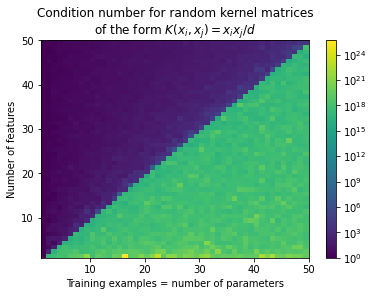

In [23]:
n_max = 50
p_max = 50

c_numbers = np.zeros(shape=(p_max-1, n_max-1))
for n in range(1, n_max):
    for p in range(1, p_max):
        c_numbers[p-1, n-1] = condition_number_kernel(p, n, rng)
        
plt.pcolor(range(1, n_max+1), range(1, p_max+1), c_numbers, norm=LogNorm())
plt.xlabel('Training examples = number of parameters')
plt.ylabel('Number of features')
plt.title('Condition number for random kernel matrices\nof the form ' + r'$K(x_i, x_j) = x_i x_j / d$')
plt.colorbar()
plt.savefig(f'{save_folder}/condition_number_simple_kernel_nd.pdf', bbox_inches='tight')

Text(0.5, 1.0, 'Condition number for random kernel matrices\nof the form $K(x_i, x_j) = \\exp(-||x_i - x_j||^2/2\\sigma^2)$')

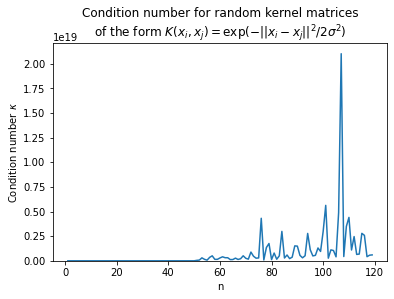

In [8]:
p = 50
span = range(1, 120)
c_number = []
for n in span:
    c_number.append(condition_number_kernel(p, n, rng))
    
plt.plot(span, c_number)
plt.xlabel('n')
# plt.xlim(3, 150)
plt.ylim(bottom=0)
plt.ylabel(r'Condition number $\kappa$')
plt.title('Condition number for random kernel matrices\nof the form ' + r'$K(x_i, x_j) = \exp(-||x_i - x_j||^2/2\sigma^2)$')
# plt.savefig(f'{save_folder}/condition_number_random_matrices.pdf')